## Predict Heart Disease using Machine Learning

## Imports and  Libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import collections
from PIL import Image

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'CSE366_Project .ipynb', 'CSE366_Project_Group_6_Predict_Heart_Disease_using_Machine_Learning.ipynb', 'Predicting Heart Disease with Classification Machine Learning Algorithms.ipynb', 'Predict_Heart_Disease.csv']


## Importing The Dataset ( Predict_Heart_Disease )

#####  Dataset Link ->  https://drive.google.com/file/d/1eXiKI5zG-ltuD9mLSGdK1q1JZbJkc8VE/view?usp=sharing

In [ ]:
dataset = pd.read_csv("Predict_Heart_Disease.csv")


### Dataset Shape

In [ ]:
dataset.shape

(270, 14)

#### Printing Top Five Columns 

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


### Dataset Description 

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


#### Our Dataset Columns Details:

In [ ]:
print("Dataset information")
print("Age           (age): Age in years.")
print("Sex           (sex): Sex (1=male; 0=female).")
print("Cp             (cp): Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).")
print("Trestbps (trestbps): Resting blood pressure in mm Hg on admission to the hospital.")
print("Chol         (chol): Serum cholesterol in mg/dl.")
print("fbs           (fbs): Fasting blood sugar > 120 mg/dl (1=true; 0=false).")
print("Restecg   (restecg): Resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).")
print("Thalach   (thalach): Maximum heart rate achieved. Exang: exercise-induced angina (1=yes; 0=no).")
print("Oldpeak   (oldpeak): ST depression induced by exercise relative to rest.")
print("Slope       (slope): The slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).")
print("Ca             (ca): Number of major vessels (0–3) colored by fluorosopy.")
print("Thal         (thal): Thalassemia (3=normal; 6=fixed defect; 7=reversable defect).")
print("Target     (target): Heart disease (1=no, 2=yes) ")

Dataset information
Age           (age): Age in years.
Sex           (sex): Sex (1=male; 0=female).
Cp             (cp): Chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).
Trestbps (trestbps): Resting blood pressure in mm Hg on admission to the hospital.
Chol         (chol): Serum cholesterol in mg/dl.
fbs           (fbs): Fasting blood sugar > 120 mg/dl (1=true; 0=false).
Restecg   (restecg): Resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).
Thalach   (thalach): Maximum heart rate achieved. Exang: exercise-induced angina (1=yes; 0=no).
Oldpeak   (oldpeak): ST depression induced by exercise relative to rest.
Slope       (slope): The slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).
Ca             (ca): Number of major vessels (0–3) colored by fluorosopy.
Thal         (thal): Thalassemia (3=normal; 6=fixed defect; 7=reversable defe

### The target Variable Description 

In [ ]:
print(dataset["target"].describe())

count    270.000000
mean       1.444444
std        0.497827
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64


In [ ]:
print(dataset["target"].unique())

[2 1]


### As the target variable have only values '1' and '2' unique value this is a classification problem

### Correlation Between Columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=True))

fbs         0.016319
chol        0.118021
trestbps    0.155383
restecg     0.182091
age         0.212322
sex         0.297721
slope       0.337616
cp          0.417436
oldpeak     0.417967
thalach     0.418514
exang       0.419303
ca          0.455336
thal        0.525020
target      1.000000
Name: target, dtype: float64


<AxesSubplot:>

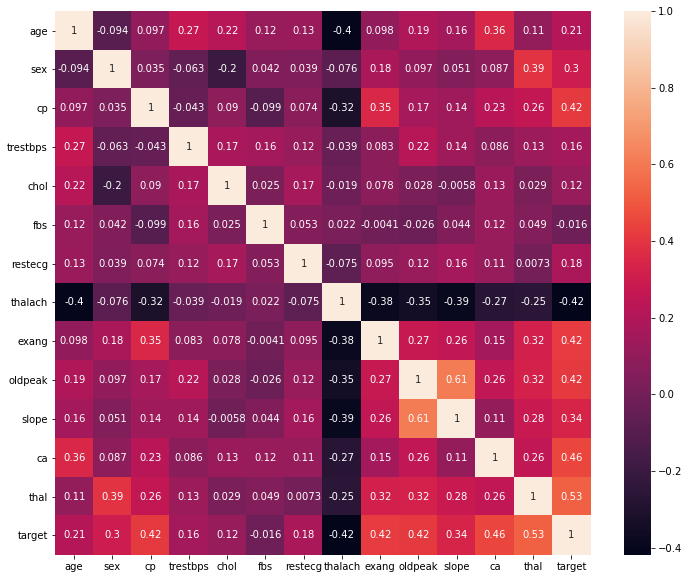

In [ ]:
correlation = dataset.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels=correlation.columns,annot=True)

## Now, The Data Analysis Part

### Let's analysing the output variable which is "target".

1    150
2    120
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


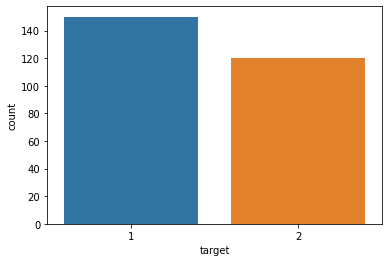

In [ ]:
y = dataset["target"]

t_VC = dataset.target.value_counts()

print(t_VC)

print(sns.countplot(y))

In [ ]:
without_heart_problems = round(t_VC[1]*100/270,2)
with_heart_problems = round(t_VC[2]*100/270,2)
print("Percentage of people without heart problems:", without_heart_problems)
print("Percentage of people with heart problems   :", with_heart_problems)

Percentage of people without heart problems: 55.56
Percentage of people with heart problems   : 44.44


### Now, analysing the other variables   ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal') as features.

### Let's analysing the feature which is Sex

In [ ]:
print(dataset["sex"].unique())

[1 0]


##### The 'sex' feature has one 2 unique value

AxesSubplot(0.125,0.125;0.775x0.755)


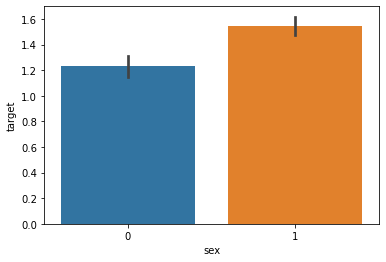

In [ ]:
print(sns.barplot(dataset["sex"],y))

##### Here, that female are have more heart problems than males

### Let's analysing the feature which is  Chest Pain Type

In [ ]:
print(dataset["cp"].unique())

[4 3 2 1]


##### The CP has values from 0 to 3 only.

AxesSubplot(0.125,0.125;0.775x0.755)


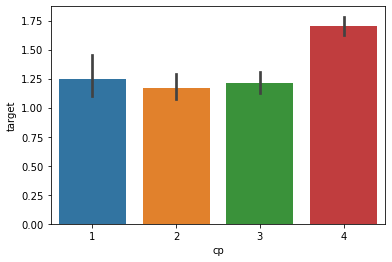

In [ ]:
print(sns.barplot(dataset["cp"],y))

##### Here the chest pain of 0 which have typical angina are the one who could have less chance of heart problems

### Let's analysing the feature which is FBS

In [ ]:
print(dataset["fbs"].unique())

[0 1]


In [ ]:
print(dataset["fbs"].describe())

count    270.000000
mean       0.148148
std        0.355906
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64


AxesSubplot(0.125,0.125;0.775x0.755)


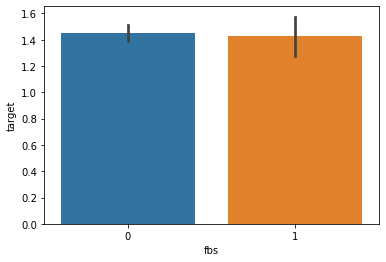

In [ ]:
print(sns.barplot(dataset["fbs"],y))

### Let's analysing the feature which is restecg

In [ ]:
print(dataset["restecg"].unique())

[2 0 1]


AxesSubplot(0.125,0.125;0.775x0.755)


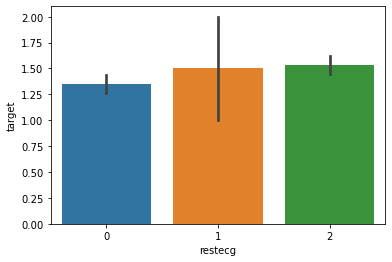

In [ ]:
print(sns.barplot(dataset["restecg"],y))

##### Here The value of restecg 1 and 0 having more chance to have a heart disease than the restecg 'with value 2

### Let's analysing the feature which is exang

In [ ]:
print(dataset["exang"].unique())

[0 1]


AxesSubplot(0.125,0.125;0.775x0.755)


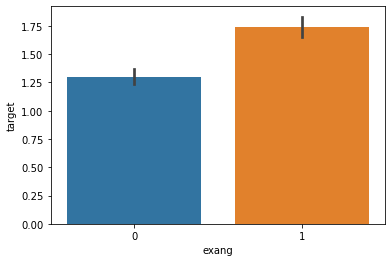

In [ ]:
print(sns.barplot(dataset["exang"],y))

##### PHere the exang 1 iehich is angina have more cchance to have heart problems

### Let's analysing the feature which is Slope

In [ ]:
print(dataset["slope"].unique())

[2 1 3]


AxesSubplot(0.125,0.125;0.775x0.755)


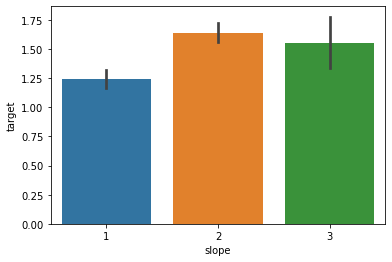

In [ ]:
print(sns.barplot(dataset["slope"],y))

##### Here, The Slope value 2 have higher heart pain than Slope with 0 and 1

### Let's analysing the feature which is ca

In [ ]:
print(dataset["ca"].unique())

[3 0 1 2]


AxesSubplot(0.125,0.125;0.775x0.755)


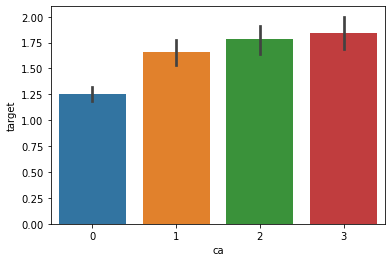

In [ ]:
print(sns.barplot(dataset["ca"],y))

##### Here when ca is 3 which is astonishingly which have highest number of heart patients

### Let's analysing the feature which is thal

In [ ]:
print(dataset["thal"].unique())

[3 7 6]


AxesSubplot(0.125,0.125;0.775x0.755)


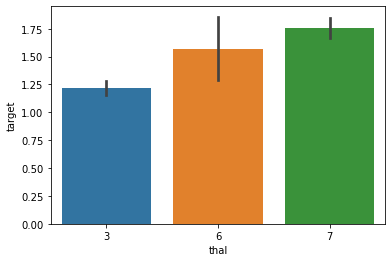

In [ ]:
print(sns.barplot(dataset["thal"],y))

AxesSubplot(0.125,0.125;0.775x0.755)


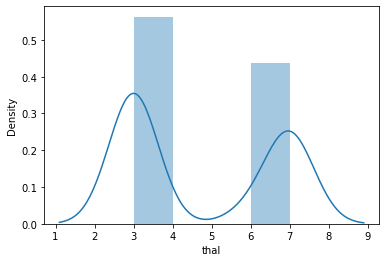

In [ ]:
print(sns.distplot(dataset["thal"]))

### Pair Plot

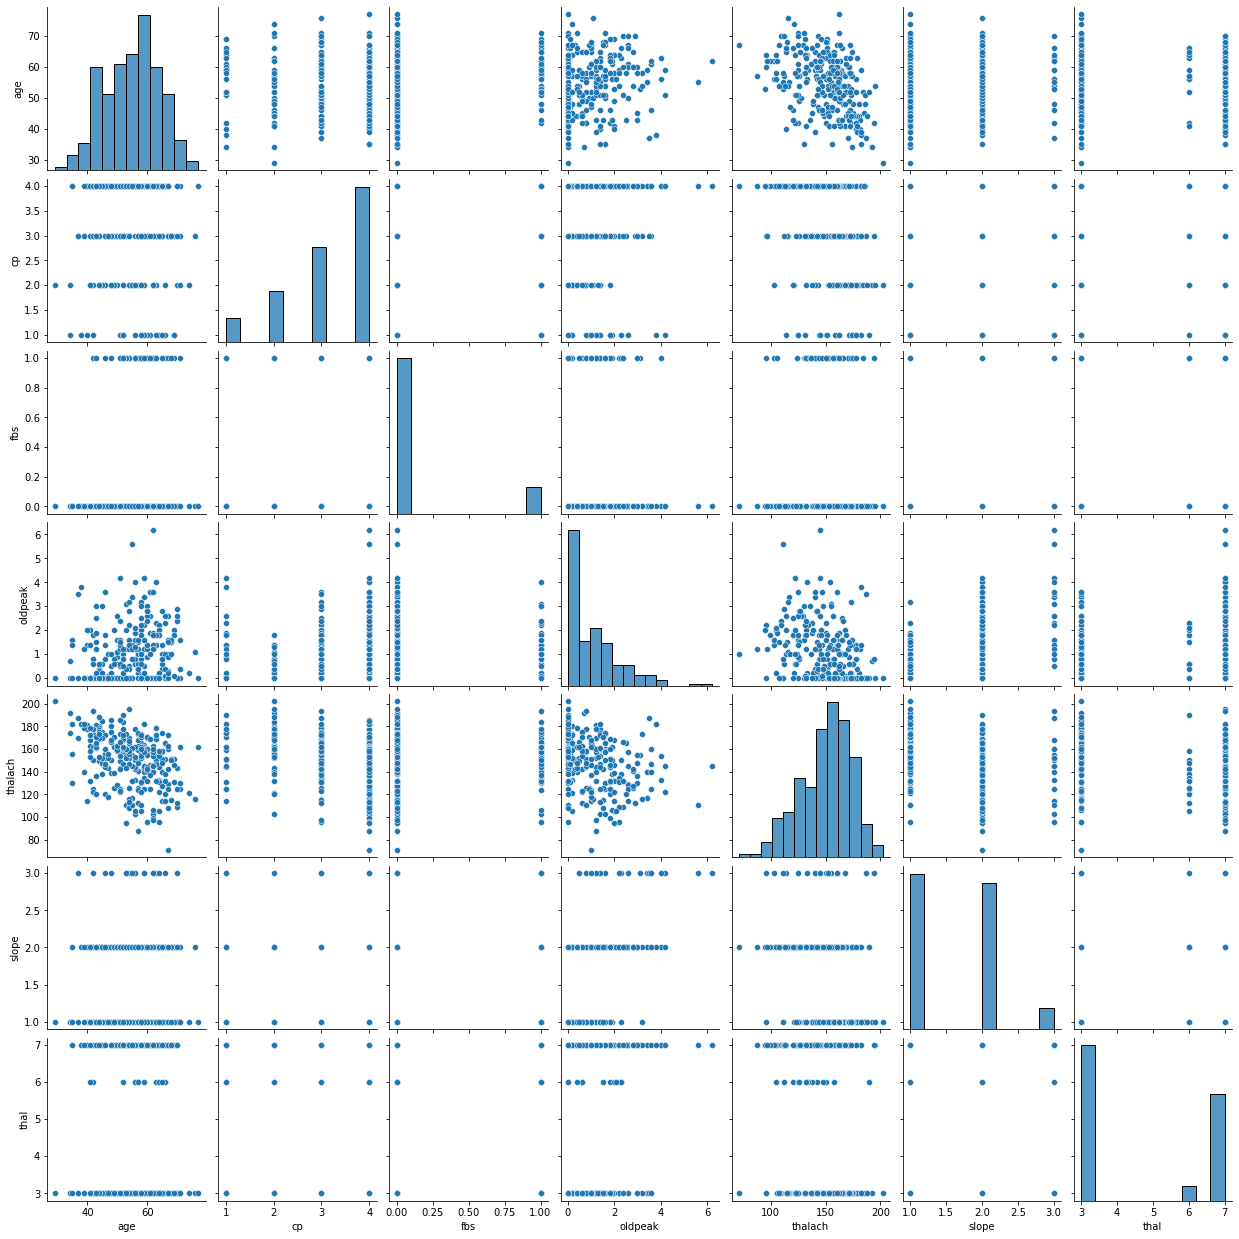

In [ ]:
dataset_Pair_Plot = dataset[['age','cp','fbs','oldpeak','thalach','slope','thal']]
print(sns.pairplot(dataset_Pair_Plot))

### Cat Plot

Text(11.14638020833334, 0.5, 'ST Depression')

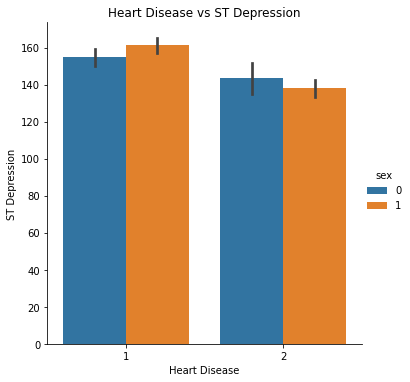

In [ ]:
sns.catplot(x= 'target', y= 'thalach',hue="sex", kind="bar", data=dataset)
plt.title('Heart Disease vs ST Depression')
plt.xlabel('Heart Disease')
plt.ylabel('ST Depression')

### Box Plot and Violin Plot

Text(0, 0.5, 'ST Depression')

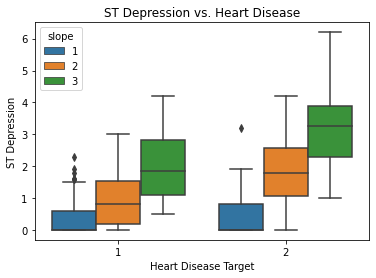

In [ ]:
sns.boxplot(x="target", y="oldpeak", hue="slope", data=dataset )
plt.title("ST Depression vs. Heart Disease")
plt.xlabel("Heart Disease Target")
plt.ylabel("ST Depression")

Text(0, 0.5, 'Restecg Level')

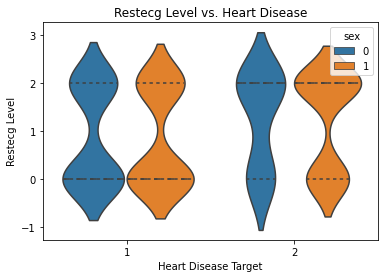

In [ ]:
sns.violinplot(x= 'target', y= 'restecg',hue="sex", inner='quartile',data= dataset )
plt.title("Restecg Level vs. Heart Disease")
plt.xlabel("Heart Disease Target")
plt.ylabel("Restecg Level")

## Now lets split the dataset into Training and Test Set.

In [ ]:
from sklearn.model_selection import train_test_split

predictor = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictor,target,test_size=1/5,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(216, 13)
(54, 13)
(216,)
(54,)


In [ ]:
one_negative = dataset[dataset['target']==1]
print(one_negative.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean    52.706667    0.553333    2.820000  128.866667  244.213333    0.153333   
std      9.509830    0.498813    0.927362   16.457660   54.019085    0.361516   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     45.000000    0.000000    2.000000  120.000000  209.000000    0.000000   
50%     52.000000    1.000000    3.000000  130.000000  236.000000    0.000000   
75%     59.000000    1.000000    3.750000  140.000000  268.750000    0.000000   
max     76.000000    1.000000    4.000000  180.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000   
mean     0.860000  158.333333    0.153333    0.622667    1.400000    0.286667   
std      0.990085   19.2833

In [ ]:
two_positive  = dataset[dataset['target']==2]
print(two_positive.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  120.000000  120.000000  120.000000  120.000000  120.000000  120.000000   
mean    56.591667    0.833333    3.616667  134.441667  256.466667    0.141667   
std      8.116273    0.374241    0.779823   19.095424   47.969166    0.350170   
min     35.000000    0.000000    1.000000  100.000000  149.000000    0.000000   
25%     52.000000    1.000000    4.000000  120.000000  227.250000    0.000000   
50%     58.000000    1.000000    4.000000  130.000000  255.500000    0.000000   
75%     62.000000    1.000000    4.000000  145.000000  286.500000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  409.000000    1.000000   

         restecg     thalach      exang     oldpeak       slope          ca  \
count  120.00000  120.000000  120.00000  120.000000  120.000000  120.000000   
mean     1.22500  138.858333    0.55000    1.584167    1.816667    1.150000   
std      0.97414   23.130719    0

In [ ]:
print("Positive ST depression:", two_positive['oldpeak'].mean())
print("Negative ST depression:", one_negative['oldpeak'].mean())
print("Positive thalach      :",two_positive['thalach'].mean())
print("Negative thalach      :",one_negative['thalach'].mean())

Positive ST depression: 1.584166666666667
Negative ST depression: 0.6226666666666668
Positive thalach      : 138.85833333333332
Negative thalach      : 158.33333333333334


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Now, Lets fit the Model

### Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report 
from sklearn.metrics import *


SVM = svm.SVC(kernel='linear')

SVM.fit(X_train, Y_train)

pred_y_SVM = SVM.predict(X_test)

print("The shape is: ",pred_y_SVM.shape)

print(classification_report(Y_test, pred_y_SVM))

cmatrix = confusion_matrix(Y_test, pred_y_SVM)
print("Confusion Matrix is : ")
print(cmatrix)

The shape is:  (54,)
              precision    recall  f1-score   support

           1       0.77      0.80      0.79        30
           2       0.74      0.71      0.72        24

    accuracy                           0.76        54
   macro avg       0.76      0.75      0.76        54
weighted avg       0.76      0.76      0.76        54

Confusion Matrix is : 
[[24  6]
 [ 7 17]]


### Decision Tree classifier (DT)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 

DT = DecisionTreeClassifier() 
DT.fit(X_train, Y_train) 

pred_y_DT = DT.predict(X_test) 

print("The shape is: ",pred_y_DT.shape)

print(classification_report(Y_test, pred_y_DT)) 

cmatrix = confusion_matrix(Y_test, pred_y_DT)
print("Confusion Matrix is : ")
print(cmatrix)

The shape is:  (54,)
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54

Confusion Matrix is : 
[[24  6]
 [ 6 18]]


In [ ]:
# Now to ge the better accuracy 

from sklearn.tree import DecisionTreeClassifier

accuracy_value = 0

for i in range(20):
    DT = DecisionTreeClassifier(random_state = i )
    DT.fit(X_train,Y_train)
    pred_Y_DT = DT.predict(X_test)
    current = round(accuracy_score(pred_Y_DT,Y_test)*100,2)
    if(accuracy_value < current):
        accuracy_value = current
        best_state = i

DT_best = DecisionTreeClassifier(random_state = best_state)
DT_best.fit(X_train,Y_train)
pred_Y_DT_best = DT_best.predict(X_test)

print("The shape is: ",pred_Y_DT_best.shape)

print(classification_report(Y_test, pred_Y_DT_best))

cmatrix = confusion_matrix(Y_test, pred_Y_DT_best)
print("Confusion Matrix is : ")
print(cmatrix)

The shape is:  (54,)
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        30
           2       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54

Confusion Matrix is : 
[[26  4]
 [ 4 20]]


In [ ]:
features = dataset.columns
features = [x for x in features if x != 'target']
train, test = train_test_split(dataset, test_size = 0.20)
                                               
dt= DecisionTreeClassifier(min_samples_split = 100, criterion='entropy')

x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]
dt = dt.fit(x_train, y_train)

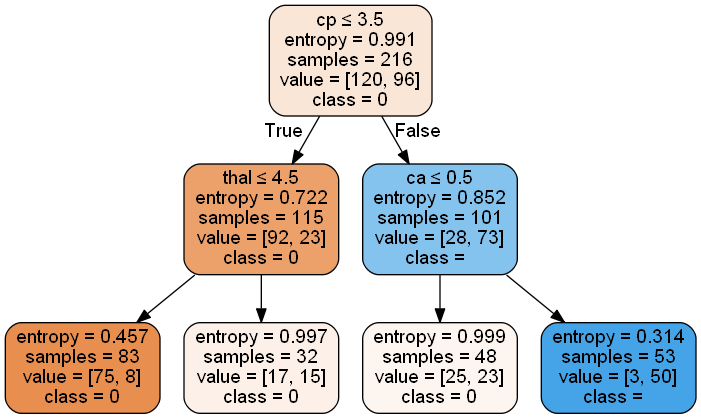

In [ ]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=features,  
                     class_names=str(dataset.target),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Random Forest classifier (RF)

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, Y_train) 

pred_y_RF = RF.predict(X_test) 

print("The shape is: ",pred_y_RF.shape)

print(classification_report(Y_test, pred_y_RF))

cmatrix = confusion_matrix(Y_test, pred_y_RF)
print("Confusion Matrix is : ")
print(cmatrix)

The shape is:  (54,)
              precision    recall  f1-score   support

           1       0.78      0.83      0.81        30
           2       0.77      0.71      0.74        24

    accuracy                           0.78        54
   macro avg       0.78      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54

Confusion Matrix is : 
[[25  5]
 [ 7 17]]


In [ ]:
# Now to ge the better accuracy 

from sklearn.metrics import accuracy_score
accuracy_value = 0

for i in range(150):
    RF = RandomForestClassifier(random_state = i)
    RF.fit(X_train,Y_train)
    Y_pred_RF = RF.predict(X_test)
    current = round(accuracy_score(Y_pred_RF,Y_test)*100,2)
    if(accuracy_value < current):
        accuracy_value = current
        best_state = i

RF_best = RandomForestClassifier(random_state = best_state)
RF_best.fit(X_train, Y_train) 

pred_y_RF_best = RF_best.predict(X_test) 

print("The shape is: ",pred_y_RF_best.shape)

print(classification_report(Y_test, pred_y_RF_best))

cmatrix = confusion_matrix(Y_test, pred_y_RF_best)
print("Confusion Matrix is : ")
print(cmatrix)

The shape is:  (54,)
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        30
           2       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54

Confusion Matrix is : 
[[26  4]
 [ 4 20]]


# Now to Predict the Output lets look at the given scenario 

Scenario : 1  

Suppose X is a patient. She is a 56 years old female (value 0), with a chest pain value of 4 (atypical angina), with resting blood pressure of 200. In addition, he has a serum cholesterol of 288 mg/dl. He is fasting blood sugar 110 mg/dl (Value 1). He has a resting electrocardiographic result of 2. The patients maximum heart rate achieved is 133. Also, he was exercise induced angina(Value 1).His ST depression induced by exercise relative to rest value was 4.The slope of the peak 
The slope of the peak exercise ST segment is flat (Value 3). He has no major vessels colored by fluoroscopy (value 2), and in addition his maximum heart rate achieved is a reversable defect (value 7). 

Based on this information, we can classify if this patient is with heart disease or not.

In [ ]:
X_patient = RF_best.predict(sc.transform([[51,1,3,100,222,0,0,143,1,1.2,2,0,3]]))
print(X_patient)

[1]


### As the value is 1, X patient does not have Heart disease.

Scenario: 2 

Suppose Y is a patient. He is a 51 years old male (value 1), with a chest pain value of 3 (atypical angina), with resting blood pressure of 100. In addition, he has a serum cholesterol of 222 mg/dl. He is fasting blood sugar 140mg/dl (Value 0). He has a resting electrocardiographic result of 0. The patients maximum heart rate achieved is 143. Also, he was exercise induced angina (Value 1). His ST depression induced by exercise relative to rest value was 1..2

Based on this information, we can classify if this patient is with heart disease or not.

In [ ]:
Y_patient = RF_best.predict(sc.transform([[56,0,4,200,288,1,2,133,1,4,3,2,7]]))
print(Y_patient)

[2]


### As the value is 2, Y patient does have Heart disease. Need emergency treatment.

#     -------------------------- Thank You -------------------------- 